# Single-layer NN syntetic low-dim data
Fitting single-layer model to low dimensional dataset.
Visualzing the pNML regret.

In [39]:
%reload_ext autoreload

import os
import os.path as osp
import sys

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm as tqdm
from matplotlib import ticker
from matplotlib.ticker import FormatStrFormatter


sys.path.append("../src")
from single_layer_nn_utils import fit_mlp, calc_prediction_and_regret, load_iris_dataset


In [40]:
# Plot params
mpl.style.use("ggplot")
mpl.rcParams["axes.grid"] = True
mpl.rcParams["legend.frameon"] = True
mpl.rcParams["figure.dpi"] = 100
mpl.rcParams["axes.labelsize"] = "large"
mpl.rcParams["text.usetex"] = True
mpl.rcParams["text.usetex"] = False
mpl.rcParams["font.size"] = 14
plt.rcParams["legend.framealpha"] = 0.9
w, h = plt.rcParams.get("figure.figsize")
figsize = (0.9*w,0.9* 5/8 * h)
figsize = (0.9*w, 0.9*0.85*h)



# User params
out_dir = "../outputs/visualizations"
is_seperable_data= True # True/False

# Create out dir
os.makedirs(out_dir, exist_ok=True)


# IRIS dataset

In [41]:
x_train, y_train, x_test, x1_min, x1_max, x2_min, x2_max= load_iris_dataset(is_seperable_data)


## Fit

In [42]:
clf_erm = fit_mlp(x_train, y_train)
erm_probs = clf_erm.predict_proba(x_test)
pnml_probs, regrets = calc_prediction_and_regret(x_train, x_test, erm_probs)


## Plot

<ipython-input-43-4a57cf949df1>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels(["{:.2f}".format(i) for i in cb.get_ticks()]) # set ticks of your format


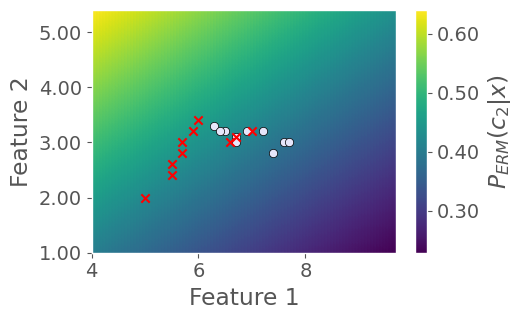

4.0 9.7
1.0 5.4


In [43]:
neg_idx = np.where(y_train == 0)[0]
pos_idx = np.where(y_train == 1)[0]

# ERM prob
fig, ax = plt.subplots(1, 1, figsize=figsize)
im = ax.scatter(x_test[:, 0], x_test[:, 1], c=erm_probs[:, 1], cmap='viridis')
ax.scatter(
    x_train[neg_idx, 0],
    x_train[neg_idx, 1],
    marker="o",
    color="lavender",
    edgecolors='black',
    label=r"Training $c_1$",
)
ax.scatter(
    x_train[pos_idx, 0],
    x_train[pos_idx, 1],
    marker="x",
    color="red",
    label=r"Training $c_2$",
)
ax.set_xlabel(r"Feature 1")
ax.set_ylabel(r"Feature 2")
cb= fig.colorbar(im, label=r"$P_{ERM}(c_2|x)$", ax=ax)
if is_seperable_data is True:
    l = ax.legend(ncol=1,loc=1,framealpha=1.0)

plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
cb.ax.set_yticklabels(["{:.2f}".format(i) for i in cb.get_ticks()]) # set ticks of your format

plt.tight_layout()
plt.savefig(osp.join(out_dir,f"low_dim_data_erm_prob_seperable={is_seperable_data}.pdf"))
plt.show()

print(x1_min, x1_max)
print(x2_min, x2_max)


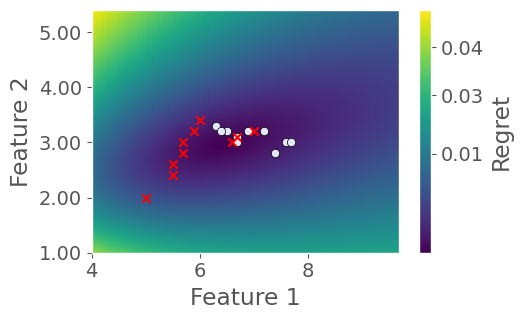

In [44]:
# Regret
fig, ax = plt.subplots(1, 1, sharex=True, figsize=figsize)
im = ax.scatter(
    x_test[:, 0],
    x_test[:, 1],
    c=regrets,
    cmap="viridis",
    norm=matplotlib.colors.PowerNorm(gamma=0.45 if is_seperable_data else 0.65),
)

ax.scatter(
    x_train[neg_idx, 0],
    x_train[neg_idx, 1],
    marker="o",
    color="lavender",
    edgecolors="black",
    label="Class 0",
)
ax.scatter(
    x_train[pos_idx, 0], x_train[pos_idx, 1], marker="x", color="red", label="Class 1",
)
ax.set_xlabel(r"Feature 1")
ax.set_ylabel(r"Feature 2")
cb = fig.colorbar(im, label="Regret", ax=ax)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)


tick_locator = ticker.MaxNLocator(nbins=5)
cb.locator = tick_locator
cb.update_ticks()

ax.yaxis.set_major_formatter(FormatStrFormatter("%.2f"))
cb.ax.set_yticklabels(
    ["{:.2f}".format(i) for i in cb.get_ticks()]
)  # set ticks of your format


plt.tight_layout()
plt.savefig(osp.join(out_dir, f"low_dim_data_regret_seperable={is_seperable_data}.pdf"))
plt.show()
